# Import all files

# web_cam8

In [1]:
import cv2 
import numpy as np
import time
import os
import shutil
import psutil
from PIL import Image
import pickle
import pandas as pd
import datetime
import random
os.chdir('/Users/NidhiAneja/Documents/AI/Cafeteria/OpenCV-Python-Series-master/src_final/')
from utils import CFEVideoConf, image_resize
import glob
from imageai.Prediction import ImagePrediction
from imageai.Detection import ObjectDetection
from imageai.Prediction.Custom import ModelTraining
from imageai.Prediction.Custom import CustomImagePrediction
import matplotlib.pyplot as plt

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
os.chdir('/Users/NidhiAneja/Documents/AI/Cafeteria/OpenCV-Python-Series-master/src_final/video-image/in')
base_dir = '/Users/NidhiAneja/Documents/AI/Cafeteria/OpenCV-Python-Series-master/src_final/video-image/in'

# Record video and save vid - saves in both mp4 and avi

# Extracts every x frame function

# Assign it to interger to make it go in order 
img_last= cv2.imread('frame{}.png'.format(count-1))
img_last= cv2.imread('{}.png'.format(count-1))

In [3]:
fps = 2000 # 1 sec

In [4]:
def extract_image_fps(video_source):
    vidcap = cv2.VideoCapture(video_source)
    count = 0
    success = True
    while success:
        vidcap.set(cv2.CAP_PROP_POS_MSEC, (count*fps))
        success, image = vidcap.read()
        img_last= cv2.imread('frame{}.png'.format(count-1))
        if np.array_equal(image, img_last):
            break
        cv2.imwrite("frame%d.png" % count, image)
        print('{}.sec reading a new frame:{}'.format(count, success))
        count += 1
    folder = os.path.dirname(video_source)
    print (folder)
'''    for each_pic in os.listdir(folder):
        pic = os.path.join(folder, each_pic)
        #print(pic)
        gg = os.path.getsize(pic) > 0
        print(gg)
        if gg == False:
            os.remove(pic)
            print('Deleted ' + pic + '!')'''

"    for each_pic in os.listdir(folder):\n        pic = os.path.join(folder, each_pic)\n        #print(pic)\n        gg = os.path.getsize(pic) > 0\n        print(gg)\n        if gg == False:\n            os.remove(pic)\n            print('Deleted ' + pic + '!')"

# Extract frames from recorded video - web camera

print(final_vid)

os.chdir(os.path.join(base_dir, student_name))
extract_image_fps(final_vid)
cap = cv2.VideoCapture(final_vid)
video_length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) - 1
try: 
    video_length > 96
    print('Video SIZE: ', video_length, 'frames')
except ValueError:
    print('Invalid video')
else:
    print('Thanks')

# Extract frames from previous recorded video (already saved)

In [5]:
print('What is the name of your folder with the video in it which is in this dir:')
print(base_dir)
print('Make sure name of the video is same as the name of the folder')
while True:
    student_name = input()
    x = os.path.join(base_dir, student_name, student_name + '.avi')
    if os.path.exists(x):
        print('Correct video')
        print(x)
        break
    elif (x == ""):
        print("Please try again")
    else:
        print('Please try again')
        

What is the name of your folder with the video in it which is in this dir:
/Users/NidhiAneja/Documents/AI/Cafeteria/OpenCV-Python-Series-master/src_final/video-image/in
Make sure name of the video is same as the name of the folder
web_cam8
Correct video
/Users/NidhiAneja/Documents/AI/Cafeteria/OpenCV-Python-Series-master/src_final/video-image/in/web_cam8/web_cam8.avi


In [6]:
x = os.listdir(os.path.join(base_dir, student_name))
match = [s for s in x if student_name in s]
filename, V_format = os.path.splitext(match[0])

In [7]:
cap = cv2.VideoCapture(os.path.join(base_dir, student_name, student_name + V_format))
video_length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) - 1
video_length

651

In [8]:
os.chdir(os.path.join(base_dir, student_name))
extract_image_fps(student_name + V_format)

0.sec reading a new frame:True
1.sec reading a new frame:True
2.sec reading a new frame:True
3.sec reading a new frame:True
4.sec reading a new frame:True
5.sec reading a new frame:True
6.sec reading a new frame:True
7.sec reading a new frame:True
8.sec reading a new frame:True
9.sec reading a new frame:True
10.sec reading a new frame:True
11.sec reading a new frame:True
12.sec reading a new frame:True
13.sec reading a new frame:True
14.sec reading a new frame:False



In [9]:

video_length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) - 1
try: 
    video_length > 96
    print('Video SIZE: ', video_length, 'frames')
except ValueError:
    print('Invalid video')
else:
    print('Thanks')

Video SIZE:  651 frames
Thanks


# Face model

In [10]:
os.chdir('/Users/NidhiAneja/Documents/AI/Cafeteria/OpenCV-Python-Series-master/src_final')

In [11]:
face_cascade = cv2.CascadeClassifier('cascades/data/haarcascade_frontalface_alt2.xml')
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer_file = '/Users/NidhiAneja/Documents/AI/Cafeteria/OpenCV-Python-Series-master/src_final/trainner.yml'
labels_file = '/Users/NidhiAneja/Documents/AI/Cafeteria/OpenCV-Python-Series-master/src_final/pickles/labels.pickle'
recognizer.read(recognizer_file)
labels = {}
with open('/Users/NidhiAneja/Documents/AI/Cafeteria/OpenCV-Python-Series-master/src_final/pickles/labels.pickle', 'rb') as f:
    og_labels = pickle.load(f)
    labels = {v:k for k,v in og_labels.items()}

In [12]:
print(og_labels)

{'aneesh': 0, 'hatcher': 1, 'jeffery': 2, 'srit': 3, 'sahil': 4, 'krutik': 5, 'kunal': 6}


In [13]:
os.chdir(os.path.join(base_dir, student_name))

In [14]:
test = os.path.join(os.path.join(base_dir, student_name), student_name + V_format)
print(test)
cap = cv2.VideoCapture(test)

/Users/NidhiAneja/Documents/AI/Cafeteria/OpenCV-Python-Series-master/src_final/video-image/in/web_cam8/web_cam8.avi


In [15]:
pick_names = []

In [16]:
video_length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) - 1
video_length

651

In [17]:
frame_cnt = 0
while(frame_cnt < video_length*.99):
    ret, frame = cap.read()
    try:
        gray  = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(frame, 
                                              scaleFactor=1.7, 
                                              minNeighbors=5)#, minSize = (100,100))
        for (x, y, w, h) in faces:
            roi_gray = gray[y:y+h, x:x+w] 
            roi_color = frame[y:y+h, x:x+w]
            id_, conf = recognizer.predict(roi_gray)
            if conf>=0 and conf < 200:
                #print(5: #id_)
                print(labels[id_])
                print(conf)
                pick_names.append([labels[id_], conf])
                img_item = "ExtractFaceFrame.png"
                cv2.imwrite(img_item, roi_gray)
                color = (255, 0, 0)
                stroke = 2
                end_cord_x = x + w
                end_cord_y = y + h
                cv2.rectangle(frame, (x, y), (end_cord_x, end_cord_y), color, stroke)
        cv2.imshow('frame',frame)
        frame_cnt += 1
        if cv2.waitKey(2) & 0xFF == ord('q'):
            break        
    except ValueError: 
        print('Something wrong... Frame is invalid?')
    else:
        print(frame_cnt)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
sahil
161.4601456690179
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271


In [18]:
pick_names[:3]

[['sahil', 161.4601456690179],
 ['aneesh', 57.19555550505901],
 ['aneesh', 59.15702255137619]]

In [19]:
df = pd.DataFrame()
for itm in pick_names:
    teststring = []
    teststring.append(itm[0])
    teststring.append(itm[1])
    df = df.append([teststring])
df.columns = ['name', 'probability']

In [20]:
df = df.sort_values(['name', 'probability'], ascending=True)
df1 = df.groupby('name')['probability'].median().reset_index()
df1 = df1.sort_values(['name'], ascending=True)
df1

,name,probability
0,aneesh,62.300456
1,kunal,59.350898
2,sahil,161.460146


In [21]:
df2 = df.name.value_counts()
df2 = pd.DataFrame(df2)
df2 = df2.sort_values(["name"], ascending=True)
df2.index.name = 'x'
df2.reset_index(inplace=True)
df2.columns = ['name', 'frequency']
df2.head(5)

,name,frequency
0,kunal,1
1,sahil,1
2,aneesh,108


In [22]:
if any(df1['name'] == df2['name'].values[0]):
    student_name_reg = df2['name'].values[0]
    print("Recognized ", df1['name'].values[0], 
          " and with a similarity index of ", df1['probability'].values[0], 
          " and face recognized ", df2['frequency'].values[0], "times out of ", video_length, "frames")
else:
    student_name_reg = 'Student_not_identified'
    df3 = pd.merge(df1, df2, on='name')
    print('Fix it against', list(df3.name))

Recognized  aneesh  and with a similarity index of  62.300456080126615  and face recognized  1 times out of  651 frames


In [23]:
df2["pct"] = df2['frequency']/ video_length
print(df2['pct'][0], "percent times faces was recognized for the highest confidence.")

0.0015360983102918587 percent times faces was recognized for the highest confidence.


In [24]:
student_name_reg

'kunal'

In [25]:
image= Image.open('ExtractFaceFrame.png')
image.show()

In [26]:
if student_name_reg == 'Student_not_identified':
    student_name_reg = 'Some_student'
    print(student_name_reg)
print(student_name_reg)

kunal


# Saves student_name as the person it detects and then after that it thinks that(the student_name) is the directoryt they need to go to 

# Part 2

In [27]:
base_dir = '/Users/NidhiAneja/Documents/AI/Cafeteria/OpenCV-Python-Series-master/src_final/video-image/'
video_in = '/Users/NidhiAneja/Documents/AI/Cafeteria/OpenCV-Python-Series-master/src_final/video-image/in/'
image_out = '/Users/NidhiAneja/Documents/AI/Cafeteria/OpenCV-Python-Series-master/src_final/video-image/out/'

In [28]:
os.chdir(video_in)
os.getcwd()

'/Users/NidhiAneja/Documents/AI/Cafeteria/OpenCV-Python-Series-master/src_final/video-image/in'

In [29]:
now = str(datetime.datetime.now())
now[:10]
os.listdir('.')

['web_cam5',
 'web_cam2',
 'web_cam3',
 'web_cam4',
 'Kunal',
 '.DS_Store',
 'phone7',
 'phone6',
 'phone1',
 'phone8',
 'web_cam8',
 'web_cam1',
 'web_cam6',
 'web_cam7',
 'phone4',
 'phone3',
 'phone2',
 'phone5']

In [30]:
os.listdir(os.path.join(video_in, student_name))
video_name = ''.join((str(student_name), V_format))

In [31]:
save_path = os.path.join(base_dir, 'in', student_name, video_name)
save_path

'/Users/NidhiAneja/Documents/AI/Cafeteria/OpenCV-Python-Series-master/src_final/video-image/in/web_cam8/web_cam8.avi'

# Part C

In [32]:
os.chdir(os.path.join(base_dir, 'in', student_name))
execution_path = (os.path.join(base_dir, 'in', student_name))
execution_path

'/Users/NidhiAneja/Documents/AI/Cafeteria/OpenCV-Python-Series-master/src_final/video-image/in/web_cam8'

# Model select

In [33]:
detector = ObjectDetection()
detector.setModelTypeAsRetinaNet()
detector.setModelPath('/Users/NidhiAneja/Documents/AI/IMAGE_AI/ImageAI-master/MODELS/resnet50_coco_best_v2.0.1.h5')
detector.loadModel()

# Seperate Objects

In [34]:
!pwd

/Users/NidhiAneja/Documents/AI/Cafeteria/OpenCV-Python-Series-master/src_final/video-image/in/web_cam8


In [35]:
lst_frames = os.listdir()
lst_frames = sorted(lst_frames)
if '.DS_Store' in lst_frames: lst_frames.remove('.DS_Store')
for filename in os.listdir(os.path.join(video_in, student_name)):
    if os.path.getsize(filename) == 0:
        os.remove(filename)
        print('done?')
print(lst_frames)

done?
['ExtractFaceFrame.png', 'frame0.png', 'frame1.png', 'frame10.png', 'frame11.png', 'frame12.png', 'frame13.png', 'frame14.png', 'frame2.png', 'frame3.png', 'frame4.png', 'frame5.png', 'frame6.png', 'frame7.png', 'frame8.png', 'frame9.png', 'web_cam8.avi']


In [36]:
lst_frames = []
for filename in os.listdir(os.path.join(video_in, student_name)):
    if filename.startswith("frame"):
        lst_frames.append(filename)
lst_frames = sorted(lst_frames)

In [37]:
for lst in lst_frames:
    print(lst)
    try:
        detections, objects_path = detector.detectCustomObjectsFromImage(input_image=os.path.join(execution_path, lst),
                                                                         output_image_path=lst[5] + str(random.randint(0,100)),
                                                                         minimum_percentage_probability=20,
                                                                         extract_detected_objects=True)
    except:
        pass
    else:
        print('Done', lst)

frame0.png
frame1.png
frame10.png
Done frame10.png
frame11.png
frame12.png
frame13.png
frame2.png
frame3.png
Done frame3.png
frame4.png
Done frame4.png
frame5.png
frame6.png
Done frame6.png
frame7.png
Done frame7.png
frame8.png
Done frame8.png
frame9.png


In [38]:
len(lst_frames)

14

In [39]:
object_folders = [x[0] for x in os.walk(execution_path)] [1:]
object_folders = sorted(object_folders)

In [40]:
i = 0
for i in range(len(object_folders)):
    path = object_folders[i]
    for filename in os.listdir(path):
        os.rename(path + '/' + filename,
                  path + '/captured' + str(random.randint(1, 10001)) + '.jpg')
        i += 1

In [41]:
remove = 0
for j in range(len(object_folders)):
    path = object_folders[j]
    for filename in os.listdir(path):
        if os.path.getsize(os.path.join(path, filename)) == 0:
            os.remove(os.path.join(path, filename))
            remove += 1
            print(remove, 'removed!')

1 removed!
2 removed!
3 removed!
4 removed!
5 removed!
6 removed!
7 removed!
8 removed!


In [42]:
if not any(os.listdir(execution_path)) == 'objects':
    os.mkdir('objects')

In [43]:
for i in range(len(object_folders)):
    object_files = os.listdir(object_folders[i])
    if '.DS_Store' in lst_frames: lst_frames.remove('.DS_Store')
    for f in object_files:
        try: 
            shutil.move(os.path.join(object_folders[i], f), os.path.join(execution_path, "objects"))
        except:
            pass

# Part 4

# Custom Model

In [44]:
custom_model_path = '/Users/NidhiAneja/Documents/AI/IMAGE_AI/ImageAI-master/'
os.chdir(os.path.join(custom_model_path, 'MODELS'))
!pwd

/Users/NidhiAneja/Documents/AI/IMAGE_AI/ImageAI-master/MODELS


In [45]:

from imageai.Prediction import ImagePrediction
#from imageai.Detection import ObjectDetection
from imageai.Prediction.Custom import ModelTraining
#from imageai.Prediction.Custom import CustomImagePrediction

In [46]:
prediction = CustomImagePrediction()
prediction.setModelTypeAsResNet()

In [47]:
os.listdir()


['model_class.json',
 'resnet50_weights_tf_dim_ordering_tf_kernels.h5',
 '.DS_Store',
 'squeezenet_weights_tf_dim_ordering_tf_kernels.h5',
 'camera_detected_video.avi',
 'yolo.h5',
 'DenseNet-BC-121-32.h5',
 'camera_detected_video.mov.avi',
 'resnet50_coco_best_v2.0.1.h5',
 'yolo-tiny.h5',
 'model_ex-022_acc-0.969893.h5',
 'inception_v3_weights_tf_dim_ordering_tf_kernels.h5']

In [48]:

prediction.setModelPath('/Users/NidhiAneja/Documents/AI/IMAGE_AI/ImageAI-master/MODELS/model_ex-022_acc-0.969893.h5')
prediction.setJsonPath('/Users/NidhiAneja/Documents/AI/IMAGE_AI/ImageAI-master/MODELS/model_class.json')
prediction.loadModel(num_objects = 10)

In [49]:
detected_path = os.path.join(execution_path, "objects")
all_files = os.listdir(detected_path)
if '.DS_Store' in lst_frames: lst_frames.remove('.DS_Store')
all_files[:2]

['captured8900.jpg', 'captured6079.jpg']

In [50]:
all_images_array = []
for each_file in all_files:
    if(each_file.endswith('.jpg') or each_file.endswith('.png')):
        all_images_array.append(each_file)
all_images_array[:2]

['captured8900.jpg', 'captured6079.jpg']

In [51]:
os.chdir(detected_path)
results_array = prediction.predictMultipleImages(all_images_array,
                                                result_count_per_image = 1)

In [52]:
save_results = []
for i in results_array:
    FoodItem, Probability = i["predictions"], i["percentage_probabilities"]
    for idx in range(len(FoodItem)):
        save_results.append((FoodItem[idx], Probability[idx]))

In [53]:
save_results[:1]

[('Cheerios', '100.0')]

In [54]:
import pandas as pd
df = pd.DataFrame(save_results, columns = ['FoodItem', 'Probability'])
df.head(2)


,FoodItem,Probability
0,Cheerios,100.0
1,Burger,95.80783247947693


In [55]:
df["image_name"] = all_images_array
df.head(1)

,FoodItem,Probability,image_name
0,Cheerios,100.0,captured8900.jpg


In [56]:
file_ext = str(random.randint(1, 100))
df.to_csv(os.path.join(execution_path, "save_results" + file_ext + ".csv"), index=False, encoding='utf8')

In [57]:
df=df.sort_values(['FoodItem', "Probability"], ascending=False)
df.head(1)

,FoodItem,Probability,image_name
7,Pizza,99.7895359992981,captured7364.jpg


In [58]:
dfx = df
df = df.drop_duplicates('FoodItem')
(df)

,FoodItem,Probability,image_name
7,Pizza,99.7895359992981,captured7364.jpg
40,FruitSnacks,99.99716281890869,captured3393.jpg
11,Chips,99.9860167503357,captured5986.jpg
9,Cheeseit,99.13568496704102,captured6876.jpg
31,Cheerios,99.99996423721313,captured9322.jpg
44,Burger,99.99643564224243,captured7959.jpg


In [59]:
now = str(datetime.datetime.now())
df['dates'] = (now[:10])
df['timestamp'] = (now[11:19])
df['student_name'] = student_name
df.head(2)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,FoodItem,Probability,image_name,dates,timestamp,student_name
7,Pizza,99.7895359992981,captured7364.jpg,2019-02-28,15:51:06,web_cam8
40,FruitSnacks,99.99716281890869,captured3393.jpg,2019-02-28,15:51:06,web_cam8


In [60]:
ItemCostTable = {'FoodItem': [
    'Burger',
    'Cheerios',
    'Cheeseit',
    'Chips',
    'FruitSnacks',
    'GoldenBar',
    'MilkBlue',
    'MilkPurple',
    'NakedDrink',
    'NutriGrain',
    'Pizza',
    'RiceKrispes'],
                "Cost": [1,2,3,4,5,6,7,8,9,10,11,12]}
CostTable = pd.DataFrame(ItemCostTable)
CostTable.head(2)

,FoodItem,Cost
0,Burger,1
1,Cheerios,2


In [61]:
df = pd.merge(df, CostTable, on = ['FoodItem', 'FoodItem'])
df

,FoodItem,Probability,image_name,dates,timestamp,student_name,Cost
0,Pizza,99.7895359992981,captured7364.jpg,2019-02-28,15:51:06,web_cam8,11
1,FruitSnacks,99.99716281890869,captured3393.jpg,2019-02-28,15:51:06,web_cam8,5
2,Chips,99.9860167503357,captured5986.jpg,2019-02-28,15:51:06,web_cam8,4
3,Cheeseit,99.13568496704102,captured6876.jpg,2019-02-28,15:51:06,web_cam8,3
4,Cheerios,99.99996423721313,captured9322.jpg,2019-02-28,15:51:06,web_cam8,2
5,Burger,99.99643564224243,captured7959.jpg,2019-02-28,15:51:06,web_cam8,1


In [62]:
df.to_csv(os.path.join(execution_path, "final_safe_results" + file_ext + ".csv"), index = False, encoding = 'utf8')
df

,FoodItem,Probability,image_name,dates,timestamp,student_name,Cost
0,Pizza,99.7895359992981,captured7364.jpg,2019-02-28,15:51:06,web_cam8,11
1,FruitSnacks,99.99716281890869,captured3393.jpg,2019-02-28,15:51:06,web_cam8,5
2,Chips,99.9860167503357,captured5986.jpg,2019-02-28,15:51:06,web_cam8,4
3,Cheeseit,99.13568496704102,captured6876.jpg,2019-02-28,15:51:06,web_cam8,3
4,Cheerios,99.99996423721313,captured9322.jpg,2019-02-28,15:51:06,web_cam8,2
5,Burger,99.99643564224243,captured7959.jpg,2019-02-28,15:51:06,web_cam8,1


In [63]:
os.path.join(video_in, student_name)

'/Users/NidhiAneja/Documents/AI/Cafeteria/OpenCV-Python-Series-master/src_final/video-image/in/web_cam8'

captured7364.jpg
Pizza
99.7895359992981


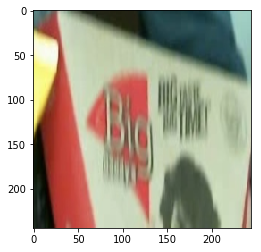

captured3393.jpg
FruitSnacks
99.99716281890869


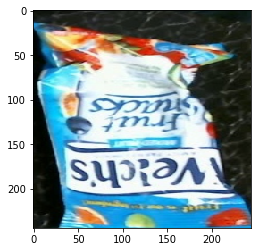

captured5986.jpg
Chips
99.9860167503357


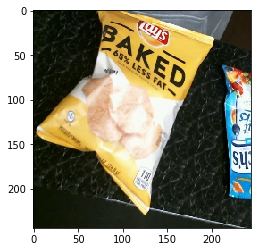

captured6876.jpg
Cheeseit
99.13568496704102


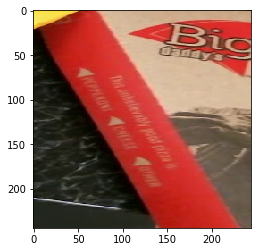

captured9322.jpg
Cheerios
99.99996423721313


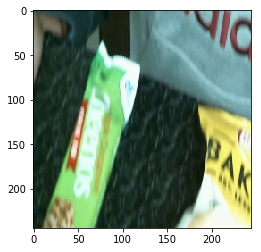

captured7959.jpg
Burger
99.99643564224243


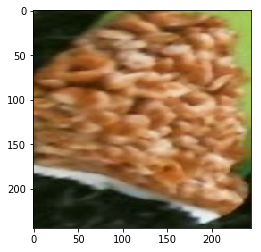

In [64]:
for i in range(len(df)):
    im = cv2.imread(os.path.join(video_in, student_name, "objects", df['image_name'].iloc[i]))
    im_resized = cv2.resize(im, (244, 244), interpolation = cv2.INTER_LINEAR)
    plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
    print(df["image_name"].iloc[i])
    print(df["FoodItem"].iloc[i])
    print(df["Probability"].iloc[i])
    plt.show()

In [65]:
itm_tags = dfx.FoodItem.value_counts()
itm_tags = pd.DataFrame(itm_tags)
itm_tags.index.name = 'x'
itm_tags.reset_index(inplace=True)
itm_tags.columns = ["FoodItem",'frequency']
itm_tags

,FoodItem,frequency
0,Burger,22
1,Chips,16
2,Cheerios,10
3,Cheeseit,8
4,Pizza,3
5,FruitSnacks,3


captured7364.jpg
Pizza
99.7895359992981


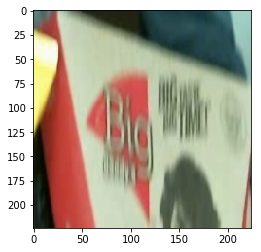

captured8454.jpg
Pizza
94.80499029159546


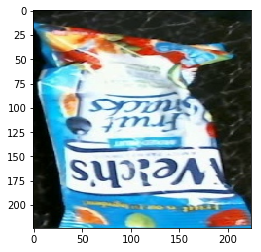

captured6125.jpg
Pizza
62.343406677246094


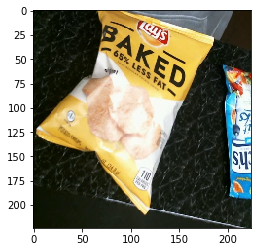

captured3393.jpg
FruitSnacks
99.99716281890869


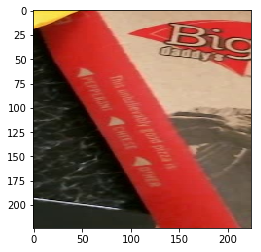

captured9454.jpg
FruitSnacks
99.9757468700409


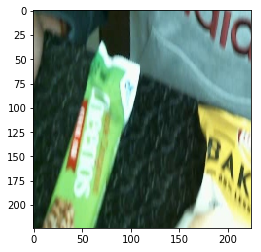

captured1134.jpg
FruitSnacks
99.25158619880676


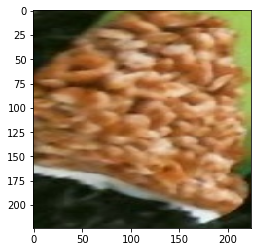

In [66]:
for i in range(len(df)):
    im = cv2.imread(os.path.join(video_in, student_name, "objects", df['image_name'].iloc[i]))
    im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)
    plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
    print (dfx["image_name"].iloc[i])
    print(dfx["FoodItem"].iloc[i])
    print(dfx["Probability"].iloc[i])
    plt.show()